# Capitulo 8 ; Seleccion de atributos 

*Usar la selección de atributos para seleccionar características que son útiles para el modelo. Las características irrelevantes pueden tener un efecto negativo en una modelo. Las características correlacionadas pueden generar coeficientes en la regresión (o importancia de la característica en los modelos de árbol) inestable o difícil de interpretar.La **`Maldición de la dimensionalidad`** es otra cuestión a considerar. Como tu aumentar el número de dimensiones de sus datos, se convierte en más escaso. Esto puede dificultar la extracción de una señal. a menos que tengas más datos. Los cálculos vecinos tienden a perder su utilidad a medida que se añaden más dimensiones. Además, el **`tiempo de entrenamiento `** suele ser función del número de columnas. (y a veces es peor que lineal). si puedes ser conciso y preciso con tus columnas, podrás tener una mejor modelo en menos tiempo. Revisaremos algunos ejemplos usando el conjunto de datos **`datos agg_df`**. Recuerda que esto es el conjunto de datos del Titanic con algunas columnas adicionales para información de la cabina. Debido a que este conjunto de datos agrega valores numéricos para cada cabina, mostrará muchas correlaciones. Otras opciones incluir PCA y observar las **`.feature_importances_ `** de un clasificador de árbol.* 

# Importacion de funciones

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from itertools import zip_longest
from tabulate import tabulate
import pdfkit
import seaborn as sns
from itertools import zip_longest
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score  
from sklearn.experimental import enable_iterative_imputer
from sklearn import impute
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier
from sklearn import metrics
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
import sklearn.tree as tree
from sklearn.metrics import accuracy_score
import sklearn.neighbors as neighbors
import sklearn.naive_bayes as nb
import sklearn.svm as svm
import sklearn.ensemble as ensemble
import xgboost
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.features import (JointPlotVisualizer,)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost

# Importar los datos 

In [75]:
# Ruta completa al archivo CSV
file_path = 'C:/Users/felip/OneDrive/Documentos/Python/Codigos/Ciencia_Datos/Datos_titanic_CSV/titanic3.csv'
# Importar la base de datos
df = pd.read_csv(file_path)
X= df
# Puedes imprimir el DataFrame si lo deseas
#print(df)
df.isnull().mean()

pclass       0.000000
survived     0.000000
name         0.000000
sex          0.000000
age          0.200917
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000764
cabin        0.774637
embarked     0.001528
boat         0.628724
body         0.907563
home.dest    0.430863
dtype: float64

# Limpieza de los datos 

In [76]:
def tweak_titanic(df):
    df = df.drop(columns=[
        "name",
        "ticket",
        "home.dest",
        "boat",
        "body",
        "cabin"
    ]).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(df, y_col, size=0.3, std_cols=None):
    #Obtencion del conjunto de prueba y entreanamiento
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=size, random_state=42)
    cols = X.columns
    num_cols = ["pclass", "age", "sibsp", "parch", "fare"]
    #Imputacion de los valores faltantes 
    fi = impute.IterativeImputer()
    X_train.loc[:, num_cols] = fi.fit_transform(X_train[num_cols])
    X_test.loc[:, num_cols] = fi.transform(X_test[num_cols])
    #Estandarizacion de los valores 
    if std_cols:
        std = preprocessing.StandardScaler()
        X_train.loc[:, std_cols] = std.fit_transform(X_train[std_cols])
        X_test.loc[:, std_cols] = std.transform(X_test[std_cols])
    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(ti_df, "survived", std_cols=std_cols)

# Manual feature Engieneering

In [77]:
#Convertimos los datos del dataframe a numericos 
df['cabin'] = pd.to_numeric(df['cabin'], errors='coerce')
#Agrupa el DataFrame por la columna "cabin"
#Aplica las funciones de agregación mínimo (min), máximo (max), media (mean), y suma (sum) a las columnas numéricas dentro de cada grupo de "cabin"
agg = (df.groupby("cabin").agg("min,max,mean,sum".split(",")).reset_index())
agg.columns = ["_".join(c).strip("_") for c in agg.columns.values]
agg_df = df.merge(agg, on="cabin")

# Collinear Columns

*Podemos usar la función correlacionada_columnas previamente definida o ejecute el siguiente código para buscar columnas que tengan una correlación coeficiente de .95 o superior:*

In [78]:
limit = 0.95
corr = agg_df.corr()
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)

In [79]:
from yellowbrick.classifier import (DiscriminationThreshold)

In [80]:
threshold=0.05
corr = agg_df.corr()
mask = np.triu(np.ones(corr.shape), k=1).astype(bool)
corr_no_diag = corr.where(mask)

In [81]:
coll = [
    c
    for c in corr_no_diag.columns
    if any(abs(corr_no_diag[c]) > threshold)
]
coll

[]

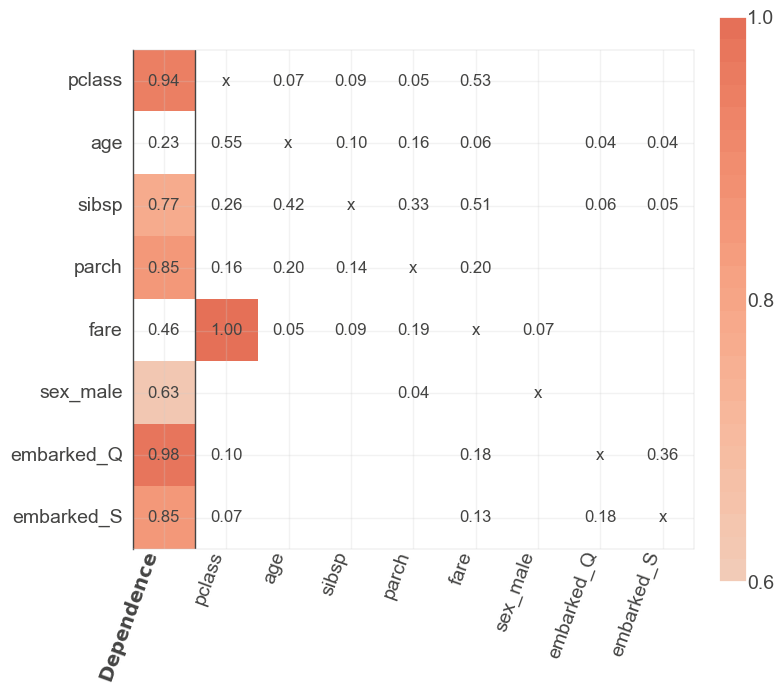

In [82]:
import rfpimp
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn

# Assuming X_train is your training data
rfpimp.plot_dependence_heatmap(
    rfpimp.feature_dependence_matrix(X_train),
    value_fontsize=12,
    label_fontsize=14,
    figsize=(8, 8),  # Remove the 'sn' here and replace it with 'sns'
)
fig = plt.gcf()
plt.show()  # Add this line to display the plot


In [83]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train, X_test, y_train, and y_test are your datasets
cols_to_remove = ["pclass", "sibsp", "parch", "embarked_Q"]

# Filter columns in training and testing sets
X_train_filtered = X_train.drop(cols_to_remove, axis=1)
X_test_filtered = X_test.drop(cols_to_remove, axis=1)

# Create and train the RandomForestClassifier
rf3 = RandomForestClassifier(random_state=42)

rf3.fit(X_train_filtered, y_train)

# Evaluate the classifier on the testing set
accuracy = rf3.score(X_test_filtered, y_test)

print("Accuracy:", accuracy)


Accuracy: 0.7557251908396947


In [84]:
rf4 = RandomForestClassifier(random_state=42)
rf4.fit(X_train, y_train)
rf4.score(X_test, y_test)

0.7938931297709924

# Lasso Regression

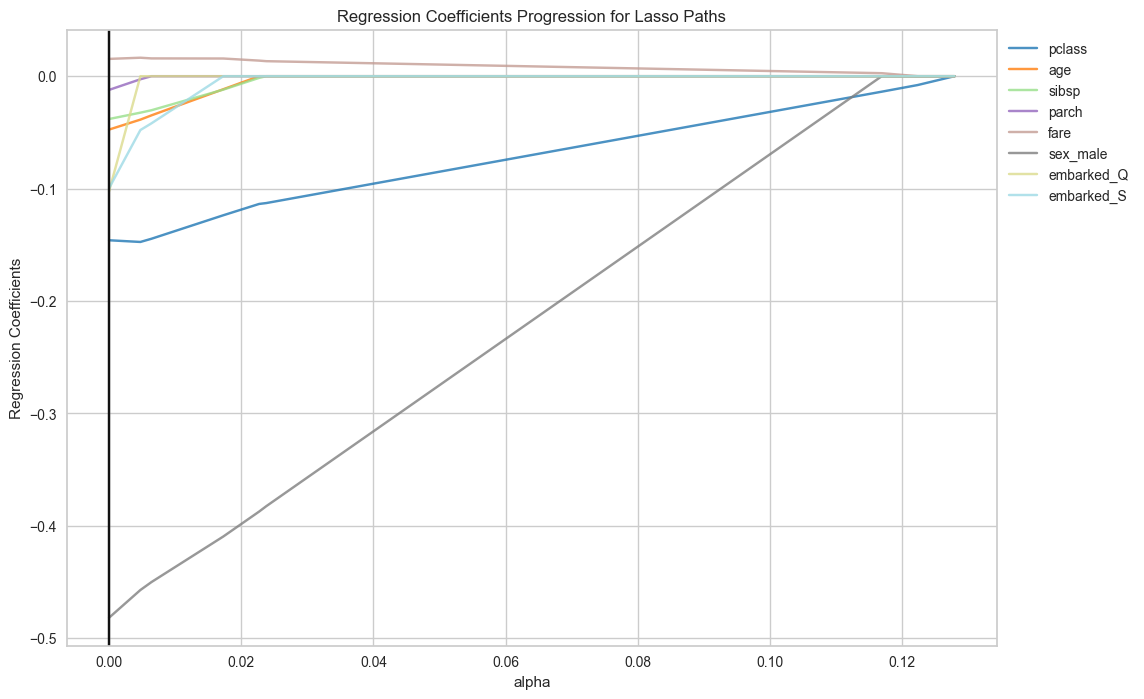

In [85]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data
model = linear_model.LassoLarsCV(cv=10, max_n_alphas=10).fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(12, 8))
cm = iter(plt.get_cmap("tab20")(np.linspace(0, 1, X_train.shape[1])))

for i in range(X_train.shape[1]):
    c = next(cm)
    ax.plot(
        model.alphas_,
        model.coef_path_.T[:, i],
        c=c,
        alpha=0.8,
        label=X_train.columns[i],
    )

ax.axvline(model.alpha_, linestyle="-", c="k", label="alphaCV")

plt.ylabel("Regression Coefficients")
ax.legend(X_train.columns, bbox_to_anchor=(1, 1))
plt.xlabel("alpha")
plt.title("Regression Coefficients Progression for Lasso Paths")

plt.show()


# Recursive Feature Elimination

La eliminación recursiva de funciones eliminará las funciones más débiles, luego ajuste un modelo (consulte la Figura 8-3). Lo hace pasando un modelo scikit-learn con .coef_ o .feature_importances_
atributos:

RFECV(ax=<Axes: >, cv=5, estimator=RandomForestClassifier())

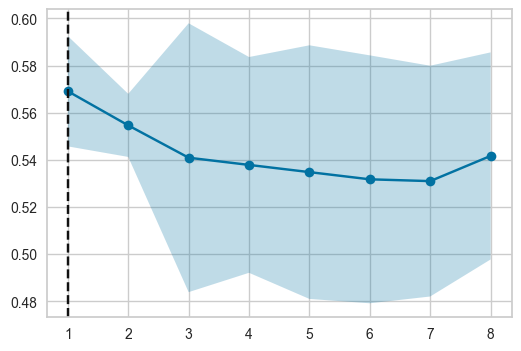

In [86]:
from yellowbrick.features import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#Todos los datos de y 
y = df["survived"]

#Todos los datos de x 
X_combined = pd.concat([X_train, X_test], axis=0)
X_combined = X_combined.reset_index(drop=True)

# Assuming X and y are your feature matrix and target variable
fig, ax = plt.subplots(figsize=(6, 4))
rfe = RFECV(
    RandomForestClassifier(n_estimators=100),
    cv=5
)
rfe.fit(X_combined, y)

In [87]:
rfe.rfe_estimator_.ranking_

array([4, 2, 3, 5, 1, 6, 8, 7])

In [88]:
rfe.rfe_estimator_.n_features_

1

In [89]:
rfe.rfe_estimator_.support_

array([False, False, False, False,  True, False, False, False])

*Usaremos la eliminación recursiva de características para encontrar las 10 más características importantes. (En este conjunto de datos agregados encontramos que ¡Se ha filtrado la columna de supervivencia!)*

# Mutual Information

*Sklearn proporciona pruebas no paramétricas que utilizarán k-más cercano vecino para determinar la información mutua entre características y el objetivo. La información mutua cuantifica la cantidad de información obtenida al observar otra variable. El valor es cero o más. Si el valor es cero entonces no hay relación. entre ellos (ver Figura 8-4). Este número no está vinculado y representa el número de bits compartidos entre la característica y el objetivo:*

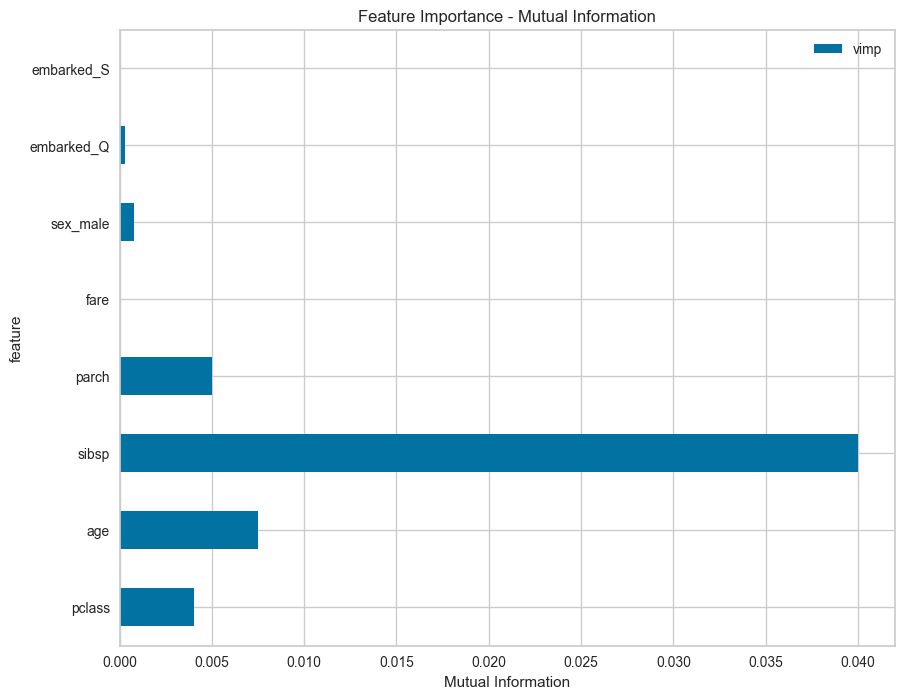

In [94]:
from sklearn import feature_selection
import matplotlib.pyplot as plt
import pandas as pd

# Suponiendo que X e y son tus datos de características y objetivos
mic = feature_selection.mutual_info_classif(X_combined, y)

# Crear un DataFrame para visualizar la importancia de las características
df_importance = pd.DataFrame({"feature": X_combined.columns, "vimp": mic})

# Establecer la característica como índice y trazar un gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 8))
df_importance.set_index("feature").plot.barh(ax=ax)

# Añadir etiquetas y título al gráfico
plt.xlabel("Mutual Information")
plt.title("Feature Importance - Mutual Information")

# Mostrar el gráfico
plt.show()


# Principal Component Analysis

Otra opción para la selección de funciones es ejecutar el componente principal análisis. Una vez que tengas los componentes principales,examinar las características que más contribuyen a ellos. Estos son características que tienen más variación. Tenga en cuenta que se trata de un programa no supervisado. algoritmo y no tiene en cuenta y.